# Multi-scene, custom object agri-PV functionality test 
## 1-up and 2-up tracker rows

## 1. Initial setup

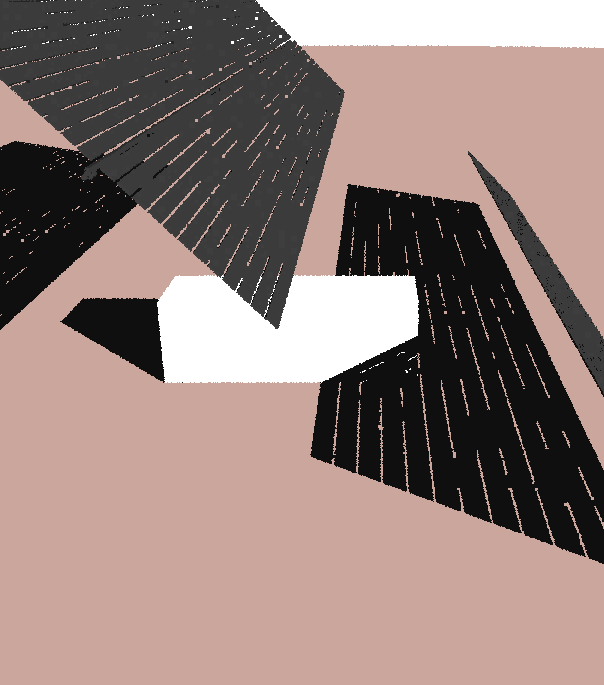

In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent / 'TEMP' /  'multiTracker')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\cdeline\Documents\Python Scripts\Bifacial_Radiance\docs\TEMP\multiTracker


In [2]:
import bifacial_radiance as br
import numpy as np
import pandas as pd

In [3]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("bifacial_radiance version ", br.__version__)

Working on a  Windows 10
Python version  3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Pandas version  1.5.3
bifacial_radiance version  0.4.2+275.gda43807.dirty


## 2. Initial variables and definition of RadObj.

In [4]:
simulationName = 'tutorial_03'    # For adding a simulation name when defning RadianceObj. This is optional.
moduletype = 'test-module'    # We will define the parameters for this below in Step 4.
albedo = "litesoil"      # this is one of the options on ground.rad
lat = 37.5   
lon = -77.6

# Scene 1 variables
nMods = 20
nRows = 1
hub_height = 5 # meters
GCR = 0.4 # meters      # We will be using GCR for this example.

# Traking parameters
cumulativesky = False
limit_angle = 45 # tracker rotation limit angle
angledelta = 0.01 # we will be doing hourly simulation, we want the angle to be as close to real tracking as possible.
backtrack = True 

#makeModule parameters
# x and y will be defined later on Step 4 for this tutorial!!
xgap = 0.01
ygap = 0.10
zgap = 0.05
numpanels = 2
axisofrotation = True  #  the scene will rotate around the torque tube, and not the middle of the bottom surface of the module
diameter = 0.1
tubetype = 'Oct'    # This will make an octagonal torque tube.
material = 'black'   # Torque tube of this material (0% reflectivity)


In [5]:
demo = br.RadianceObj(simulationName, path = str(testfolder))  # Adding a simulation name. This is optional.
demo.setGround(albedo) 
epwfile = demo.getEPW(lat=lat, lon=lon) 

starttime = '01_13';  endtime = '01_14'
metdata = demo.readWeatherFile(weatherFile=epwfile, starttime=starttime, endtime=endtime) 

path = C:\Users\cdeline\Documents\Python Scripts\Bifacial_Radiance\docs\TEMP\multiTracker
Loading albedo, 1 value(s), 0.213 avg
1 nonzero albedo values.
Getting weather file: USA_VA_Richmond.724010_TMY2.epw
 ... OK!
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


#### Make a module, one with a torque tube (module1) and without (module2)

In [6]:
numcellsx = 6
numcellsy = 12
xcell = 0.156
ycell = 0.156
xcellgap = 0.02
ycellgap = 0.02


module1 = demo.makeModule(name='module1',  x=1, y=1, xgap=xgap, ygap=ygap, 
                           zgap=zgap, numpanels=numpanels) 
module1.addTorquetube(diameter=diameter, material=material,
                       axisofrotation=axisofrotation, tubetype=tubetype)
module1.addCellModule(numcellsx=numcellsx, numcellsy=numcellsy,
                       xcell=xcell, ycell=ycell, xcellgap=xcellgap, ycellgap=ycellgap)

print(f'New module created. x={module1.x}m,  y={module1.y}m')
print(f'Cell-module parameters: {module1.cellModule}')

module2 = demo.makeModule(name='module2',  x=1, y=1, xgap=xgap, ygap=ygap, 
                           zgap=zgap, numpanels=1) 
module2.addCellModule(numcellsx=numcellsx, numcellsy=numcellsy,
                       xcell=xcell, ycell=ycell, xcellgap=xcellgap, ycellgap=ycellgap)
print(f'New module created. x={module2.x}m,  y={module2.y}m')
print(f'Cell-module parameters: {module2.cellModule}')


Module Name: module1
Module module1 updated in module.json
Pre-existing .rad file objects\module1.rad will be overwritten

Module module1 updated in module.json
Pre-existing .rad file objects\module1.rad will be overwritten

Module was shifted by 0.078 in X to avoid sensors on air
This is a Cell-Level detailed module with Packaging Factor of 0.81 
Module module1 updated in module.json
Pre-existing .rad file objects\module1.rad will be overwritten

New module created. x=1.036m,  y=2.092m
Cell-module parameters: {'numcellsx': 6, 'numcellsy': 12, 'xcell': 0.156, 'ycell': 0.156, 'xcellgap': 0.02, 'ycellgap': 0.02, 'centerJB': None}

Module Name: module2
Module module2 updated in module.json
Pre-existing .rad file objects\module2.rad will be overwritten

Module was shifted by 0.078 in X to avoid sensors on air
This is a Cell-Level detailed module with Packaging Factor of 0.81 
Module module2 updated in module.json
Pre-existing .rad file objects\module2.rad will be overwritten

New module c

In [7]:
module1

{'x': 1.036, 'y': 2.092, 'z': 0.02, 'modulematerial': 'black', 'scenex': 1.046, 'sceney': 4.284, 'scenez': 0.1, 'numpanels': 2, 'bifi': 1, 'text': '! genbox black cellPVmodule 0.156 0.156 0.02 | xform -t -0.44 -2.142 0.1 -a 6 -t 0.176 0 0 -a 12 -t 0 0.176 0 -a 2 -t 0 2.192 0\r\n! genbox black octtube1a 1.046 0.04142135623730951 0.1 | xform -t -0.523 -0.020710678118654756 -0.05\r\n! genbox black octtube1b 1.046 0.04142135623730951 0.1 | xform -t -0.445 -0.020710678118654756 -0.05 -rx 45 -t 0 0 0\r\n! genbox black octtube1c 1.046 0.04142135623730951 0.1 | xform -t -0.445 -0.020710678118654756 -0.05 -rx 90 -t 0 0 0\r\n! genbox black octtube1d 1.046 0.04142135623730951 0.1 | xform -t -0.445 -0.020710678118654756 -0.05 -rx 135 -t 0 0 0 ', 'modulefile': 'objects\\module1.rad', 'glass': False, 'offsetfromaxis': 0.1, 'xgap': 0.01, 'ygap': 0.1, 'zgap': 0.05}

In [8]:
module2


{'x': 1.036, 'y': 2.092, 'z': 0.02, 'modulematerial': 'black', 'scenex': 1.046, 'sceney': 2.092, 'scenez': 0.05, 'numpanels': 1, 'bifi': 1, 'text': '! genbox black cellPVmodule 0.156 0.156 0.02 | xform -t -0.44 -1.046 0 -a 6 -t 0.176 0 0 -a 12 -t 0 0.176 0 -a 1 -t 0 2.192 0', 'modulefile': 'objects\\module2.rad', 'glass': False, 'offsetfromaxis': 0, 'xgap': 0.01, 'ygap': 0.1, 'zgap': 0.05}

#### set tracking angles.  Here we assume GCR is the same for each scene so tracking angles work out to be equal.
#### different scene GCR's not currently supported!

In [9]:
trackerdict = demo.set1axis(metdata=metdata, limit_angle=limit_angle, backtrack=backtrack, 
                            gcr=GCR, cumulativesky=False)

In [10]:
print ("Trackerdict created by set1axis: %s " % (len(demo.trackerdict))) 

Trackerdict created by set1axis: 20 


In [11]:
trackerdict = demo.gendaylit1axis() 

Creating ~20 skyfiles. 
Created 19 skyfiles in /skies/


## 3. First scene configuration (based on tutorial 3)

In [12]:
# Scene 1 variables
nMods = 20
nRows = 1
hub_height = 5 # meters
sceneDict = {'gcr': GCR,'hub_height':hub_height, 'nMods':nMods, 'nRows': nRows}  

# making the different scenes for the 1-axis tracking for the dates in trackerdict2.
trackerdict = demo.makeScene1axis(trackerdict=trackerdict, module=module1, sceneDict=sceneDict) 


Making ~19 .rad files for gendaylit 1-axis workflow (this takes a minute..)
19 Radfiles created in /objects/


## Second scene configuration - 1 up portrait.
#### Make sure to use append=True, and change the originx

In [13]:
# Scene 2 variables
nMods = 20
nRows = 1
hub_height = 1.2 # meters
sceneDict = {'gcr': GCR,'hub_height':hub_height, 'nMods':nMods, 'nRows': nRows, 'originx' : 6}  

# making the different scenes for the 1-axis tracking for the dates in trackerdict2.
trackerdict = demo.makeScene1axis(trackerdict=trackerdict, module=module2, sceneDict=sceneDict, append=True) 


Making ~19 .rad files for gendaylit 1-axis workflow (this takes a minute..)
19 Radfiles created in /objects/


We want to check one of the tracker elements to ensure we have an array of 2 scenes 

In [14]:
trackerdict['2021-01-13_1000']['scenes'].__len__()


2

In [15]:
trackerdict['2021-01-13_1000']['scenes'][0]

{'module': {'x': 1.036, 'y': 2.092, 'z': 0.02, 'modulematerial': 'black', 'scenex': 1.046, 'sceney': 4.284, 'scenez': 0.1, 'numpanels': 2, 'bifi': 1, 'text': '! genbox black cellPVmodule 0.156 0.156 0.02 | xform -t -0.44 -2.142 0.1 -a 6 -t 0.176 0 0 -a 12 -t 0 0.176 0 -a 2 -t 0 2.192 0\r\n! genbox black octtube1a 1.046 0.04142135623730951 0.1 | xform -t -0.523 -0.020710678118654756 -0.05\r\n! genbox black octtube1b 1.046 0.04142135623730951 0.1 | xform -t -0.445 -0.020710678118654756 -0.05 -rx 45 -t 0 0 0\r\n! genbox black octtube1c 1.046 0.04142135623730951 0.1 | xform -t -0.445 -0.020710678118654756 -0.05 -rx 90 -t 0 0 0\r\n! genbox black octtube1d 1.046 0.04142135623730951 0.1 | xform -t -0.445 -0.020710678118654756 -0.05 -rx 135 -t 0 0 0 ', 'modulefile': 'objects\\module1.rad', 'glass': False, 'offsetfromaxis': 0.1, 'xgap': 0.01, 'ygap': 0.1, 'zgap': 0.05}, 'modulefile': 'objects\\module1.rad', 'hpc': False, 'name': 'Scene0', 'gcr': 0.39999999999999997, 'text': '!xform -rx 45.0 -t 

In [16]:
trackerdict['2021-01-13_1000']['scenes'][1]

{'module': {'x': 1.036, 'y': 2.092, 'z': 0.02, 'modulematerial': 'black', 'scenex': 1.046, 'sceney': 2.092, 'scenez': 0.05, 'numpanels': 1, 'bifi': 1, 'text': '! genbox black cellPVmodule 0.156 0.156 0.02 | xform -t -0.44 -1.046 0 -a 6 -t 0.176 0 0 -a 12 -t 0 0.176 0 -a 1 -t 0 2.192 0', 'modulefile': 'objects\\module2.rad', 'glass': False, 'offsetfromaxis': 0, 'xgap': 0.01, 'ygap': 0.1, 'zgap': 0.05}, 'modulefile': 'objects\\module2.rad', 'hpc': False, 'name': 'Scene1', 'gcr': 0.39999999999999997, 'text': '!xform -rx 45.0 -t 0 0 1.2 -a 20 -t 1.046 0 0 -a 1 -t 0 5.23 0 -i 1 -t -9.414 -0.0 0 -rz 90.0 -t 6 0 0 objects\\module2.rad', 'radfiles': 'objects\\1axis2021-01-13_1000__C_0.46037_rtr_5.23000_tilt_45.00000_20modsx1rows_origin6,0.rad', 'sceneDict': {'gcr': 0.4, 'nMods': 20, 'nRows': 1, 'originx': 6, 'tilt': 45.0, 'clearance_height': 0.46036630687887115, 'azimuth': 90.0, 'modulez': 0.02, 'axis_tilt': 0, 'originy': 0}}

#### try out appendtoScene functionality.  If you pass this customObject text into makeScene1axis above as `customtext`, it will automatically append to each scene in the trackerdict.

In [22]:
# There are two ways to do this, by calling SceneObj.appendtoScene directly, or by passing into makeScene1axis as 'customtext'.  

name='Car_1'
carpositionx=-2
carpositiony=-1
text='! genbox white_EPDM HondaFit 1.6 4.5 1.5 | xform -t -0.8 -2.25 0 -t {} {} 0'.format(carpositionx, carpositiony)
customObject = demo.makeCustomObject(name,text)
for key in trackerdict:
    trackerdict[key]['scenes'][0].appendtoScene(customObject='!xform -rz 90 '+ customObject)


Custom Object Name objects\Car_1.rad


#### Open the .radfile listed in our sceneObj to make sure our Car_1.rad file is appended..

In [20]:
fname = trackerdict[key]['scenes'][0].radfiles
with open(fname, 'r') as f:
    print(f.read())

!xform -rx -45.0 -t 0 0 5.0 -a 20 -t 1.046 0 0 -a 1 -t 0 10.71 0 -i 1 -t -9.414 -0.0 0 -rz 90.0 -t 0 0 0 objects\module1.rad
 !xform -rz 90 objects\Car_1.rad


In [18]:
fname = trackerdict[key]['scenes'][0].radfiles
with open(fname, 'r') as f:
    print(f.read())

!xform -rx -45.0 -t 0 0 5.0 -a 20 -t 1.046 0 0 -a 1 -t 0 10.71 0 -i 1 -t -9.414 -0.0 0 -rz 90.0 -t 0 0 0 objects\module1.rad
!xform -rz 90 objects\Car_1.rad


In [21]:
# Make the octfile
trackerdict = demo.makeOct1axis(trackerdict, singleindex='2021-01-13_1000')
## Sanity check:  #!rvu -vf views\front.vp -e 16 -pe 0.02 -vp -2 -12 14.5 1axis_2021-01-13_1000.oct


Making 1 octfiles in root directory.
Created 1axis_2021-01-13_1000.oct


In [21]:
# run the analysis.  We need to specify the scene number now - scene 0 is 2-up tracker. Scene 1 is 1-up tracker.
# 
demo.analysis1axis(singleindex='2021-01-13_1000', modWanted=7, rowWanted=1, sensorsy=2, sceneNum=0, customname='cdeline', append=False)


Linescan in process: 1axis_2021-01-13_1000cdeline_Scene0_Row1_Module7_Front


c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2887: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Linescan in process: 1axis_2021-01-13_1000cdeline_Scene0_Row1_Module7_Back
Saved: results\irr_1axis_2021-01-13_1000cdeline_Scene0_Row1_Module7.csv
Index: 2021-01-13_1000. Wm2Front: 333.5731333333333. Wm2Back: 57.15362833333333


{'2021-01-13_0800': {'surf_azm': 90.0,
  'surf_tilt': 4.2,
  'theta': -4.2,
  'dni': 13,
  'ghi': 23,
  'dhi': 22,
  'temp_air': 0.2,
  'wind_speed': 2.6,
  'skyfile': 'skies\\sky2_37.5_-77.33_2021-01-13_0800.rad',
  'scenes': [{'module': {'x': 1.036, 'y': 2.092, 'z': 0.02, 'modulematerial': 'black', 'scenex': 1.046, 'sceney': 4.284, 'scenez': 0.1, 'numpanels': 2, 'bifi': 1, 'text': '! genbox black cellPVmodule 0.156 0.156 0.02 | xform -t -0.44 -2.142 0.1 -a 6 -t 0.176 0 0 -a 12 -t 0 0.176 0 -a 2 -t 0 2.192 0\r\n! genbox black octtube1a 1.046 0.04142135623730951 0.1 | xform -t -0.523 -0.020710678118654756 -0.05\r\n! genbox black octtube1b 1.046 0.04142135623730951 0.1 | xform -t -0.445 -0.020710678118654756 -0.05 -rx 45 -t 0 0 0\r\n! genbox black octtube1c 1.046 0.04142135623730951 0.1 | xform -t -0.445 -0.020710678118654756 -0.05 -rx 90 -t 0 0 0\r\n! genbox black octtube1d 1.046 0.04142135623730951 0.1 | xform -t -0.445 -0.020710678118654756 -0.05 -rx 135 -t 0 0 0 ', 'modulefile': 'ob

In [22]:
# run calculateResults.  This returns the results dataframe.

results_2up = demo.calculateResults()
display(results_2up)

No CECModule data passed; using default for Prism Solar BHC72-400
Bifaciality factor of module stored is  1


,timestamp,name,modNum,rowNum,sceneNum,mattype,rearMat,Wm2Front,Wm2Back,backRatio,...,Pout_raw,Pout_Gfront,BGG,BGE,Mismatch,Pout,Wind Speed,DNI,DHI,GHI
0,2021-01-13_1000,1axis_2021-01-13_1000cdeline_Scene0,7,1,0,"[a6.0.a2.8.0.cellPVmodule.6457, a6.0.a2.3.1.ce...","[a6.0.a2.8.0.cellPVmodule.2310, a6.0.a2.3.1.ce...","[333.1322333333333, 334.0140333333333]","[59.59274, 54.71451666666667]","[0.17888560502869874, 0.16380854514432536]",...,163.832664,140.212646,17.133762,16.845854,0.00034,163.832108,3.6,228,144,219


#### let's run the analysis now for Scene[1].  (1-up tracker).  Trackerdict ['Results'] should get over-written, so set `overwrite=True`
#### This is because by default, re-running analysis1axis will just append results to the trackerdict.  So you'll be averaging 
#### results from different scenes.  To start your results fresh, pass `overwrite=True` into `analysis1axis`.

In [23]:

results_1up = demo.analysis1axis(singleindex='2021-01-13_1000', modWanted=[3,7], rowWanted=1, sensorsy=2, sceneNum=1, append=True)

Linescan in process: 1axis_2021-01-13_1000_Scene1_Row1_Module3_Front
Linescan in process: 1axis_2021-01-13_1000_Scene1_Row1_Module3_Back
Saved: results\irr_1axis_2021-01-13_1000_Scene1_Row1_Module3.csv
Index: 2021-01-13_1000. Wm2Front: 79.28446833333334. Wm2Back: 44.73472
Linescan in process: 1axis_2021-01-13_1000_Scene1_Row1_Module7_Front
Linescan in process: 1axis_2021-01-13_1000_Scene1_Row1_Module7_Back
Saved: results\irr_1axis_2021-01-13_1000_Scene1_Row1_Module7.csv
Index: 2021-01-13_1000. Wm2Front: 71.10902666666667. Wm2Back: 44.73472


In [24]:
fname = r'results\irr_1axis_2021-01-13_1000_Scene0_Row1_Module7.csv'
with open(fname, 'r') as f:
    print(f.read())

x,y,z,rearZ,mattype,rearMat,Wm2Front,Wm2Back,Back/FrontRatio
0.5904342,-3.138,4.580686,4.565129,a6.0.a2.8.0.cellPVmodule.6457,a6.0.a2.8.0.cellPVmodule.2310,333.6278,59.720819999999996,0.1790037910396225
-0.4193143,-3.138,5.590434,5.574878,a6.0.a2.3.1.cellPVmodule.6457,a6.0.a2.3.1.cellPVmodule.2310,333.8760333333333,54.73158333333333,0.16392736806994115



In [25]:
fname = r'results\irr_1axis_2021-01-13_1000_Scene1_Row1_Module3.csv'
with open(fname, 'r') as f:
    print(f.read())

x,y,z,rearZ,mattype,rearMat,Wm2Front,Wm2Back,Back/FrontRatio
6.261394,-7.322,0.9683047,0.9527483,groundplane,sky,68.58062666666667,44.73472,0.6522843241591236
5.768305,-7.322,1.461394,1.445837,groundplane,sky,89.98831,44.73472,0.4971114902425633




#### The scan location appears to be off on Scene1... viewpoint is smack in between cells in the cellModule?

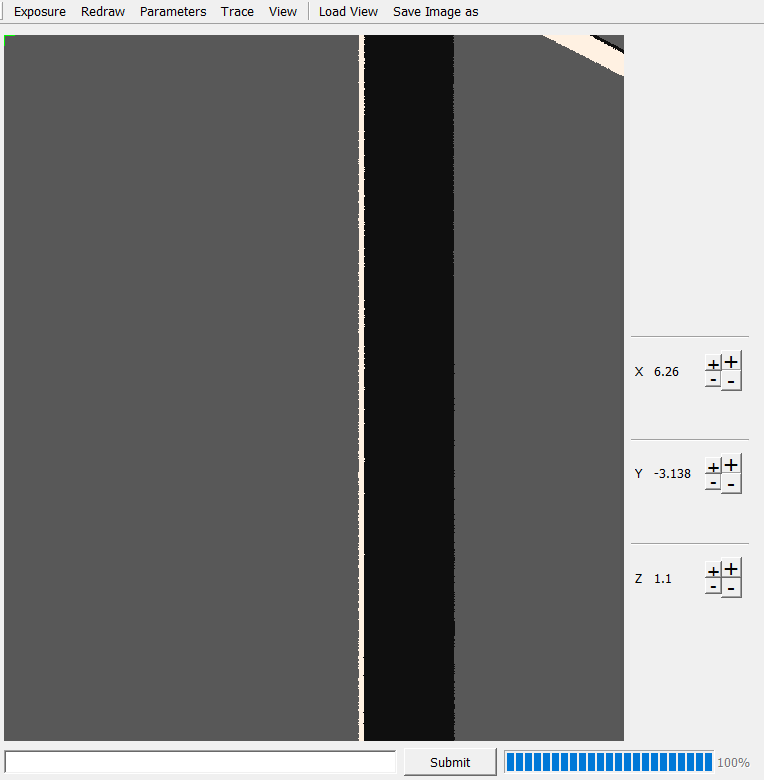

In [26]:
# run calculateResult - 
results_1up = demo.calculateResults()
display(results_1up)

No CECModule data passed; using default for Prism Solar BHC72-400
Bifaciality factor of module stored is  1


,timestamp,name,modNum,rowNum,sceneNum,mattype,rearMat,Wm2Front,Wm2Back,backRatio,...,Pout_raw,Pout_Gfront,BGG,BGE,Mismatch,Pout,Wind Speed,DNI,DHI,GHI
0,2021-01-13_1000,1axis_2021-01-13_1000cdeline_Scene0,7,1,0,"[a6.0.a2.8.0.cellPVmodule.6457, a6.0.a2.3.1.ce...","[a6.0.a2.8.0.cellPVmodule.2310, a6.0.a2.3.1.ce...","[333.1322333333333, 334.0140333333333]","[59.59274, 54.71451666666667]","[0.17888560502869874, 0.16380854514432536]",...,163.832664,140.212646,17.133762,16.845854,0.00034,163.832108,3.6,228,144,219
1,2021-01-13_1000,1axis_2021-01-13_1000_Scene1,3,1,1,"[groundplane, groundplane]","[sky, sky]","[68.58062666666667, 89.98831]","[44.73472, 44.73472]","[0.6522843241591236, 0.4971114902425633]",...,NaN,NaN,NaN,NaN,NaN,NaN,3.6,228,144,219
2,2021-01-13_1000,1axis_2021-01-13_1000_Scene1,7,1,1,"[groundplane, groundplane]","[sky, sky]","[60.72608, 81.49197333333332]","[44.73472, 44.73472]","[0.7366519187156703, 0.5489395977370974]",...,NaN,NaN,NaN,NaN,NaN,NaN,3.6,228,144,219


# Now test out AgriPV functions..
### do analysis1axis 

In [27]:
# do a ground scan underneath scene 1 at 10:00A
analysis = br.AnalysisObj()
scene1 = demo.trackerdict['2021-01-13_1000']['scenes'][1]
(frontscanind, backscanind, groundscan) = analysis.moduleAnalysis(scene=scene1, sensorsground = 4)
print(groundscan)

{'xstart': 0.0, 'ystart': 0.0, 'zstart': 0.05, 'xinc': 1.558534183543639, 'yinc': 0.7811416707851865, 'zinc': 0.14792673862422576, 'sx_xinc': 0.0, 'sx_yinc': 0.0, 'sx_zinc': 0.0, 'Nx': 1, 'Ny': 4, 'Nz': 1, 'orient': '0 0 -1'}


#### This looks wrong....